In [0]:
'''
Lugar para respuestas:
1. Las clases que se van a predecir son 10: 0,1,2,3,4,5,6,7,8,9 el modelo que se entrene debe determinar si la imagen de prueba 
   pertenece a uno de estas clases, el modelo determinará si la imagen dada como prueba pertenece a una de las 10 clases, si se 
   reduce las salidas a una entonces solo se entrenaría el modelo para predecir una sola clase.
2. No, Se han probado datos normalizados y se obtienen estos resultado:
      Epoch 32/32
      13400/13400 [==============================] - 4s 270us/step - loss: 2.3012 - acc: 0.1112 - val_loss: 2.8791 - val_acc: 0.1042
      Epoch 32/32
      13400/13400 [==============================] - 4s 272us/step - loss: 2.3011 - acc: 0.1111 - val_loss: 2.9154 - val_acc: 0.1171
    
    con los datos sin normalizar se tiene mejores resultados desde la primera iteracion
    
      Epoch 1/32
      13400/13400 [==============================] - 4s 314us/step - loss: 8.0944 - acc: 0.3637 - val_loss: 0.2643 - val_acc: 0.9206
 
3. Se agregó un monitor al modelo dado, y al modelo con Pooling tras cada capa convolucional ambos modelos lograron acercarse a  un 0.98
   de precisión en la décima iteración
    Modelo Dado
      Epoch 10/32
      13400/13400 [==============================] - 4s 271us/step - loss: 0.0259 - acc: 0.9913 - val_loss: 0.0803 - val_acc: 0.9809
      <keras.callbacks.History at 0x7fb2a7403be0>
 
    Modelo con Pooling
      Epoch 10/32
      13400/13400 [==============================] - 2s 181us/step - loss: 0.0697 - acc: 0.9791 - val_loss: 0.0884 - val_acc: 0.9780
      <keras.callbacks.History at 0x7fb2a8636710>
 
    Se nota también que los resultados del modelo dado logran estos resultados en la evaluación
      Test loss: 0.03555494838170143
      Test accuracy: 0.98995
 
    pero el modelo con Pooling tras cada bloque convolucional logra estos resultados en la evaluación
      Test loss: 0.02965186805515914
      Test accuracy: 0.99255
 
    logrando una pequeña mejora.

'''

import keras
import numpy as np
from numpy import genfromtxt

Using TensorFlow backend.


In [0]:
data = genfromtxt('./sample_data/mnist_train_small.csv',delimiter=',')
# We have 784 spaces for features
# 1 space for the class
dims = data.shape
print(dims)
print(data[0,:].shape)

(20000, 785)
(785,)


In [0]:
test_sample = np.resize(data[0,1:],[28,28])
print(test_sample.shape)

(28, 28)


6.0


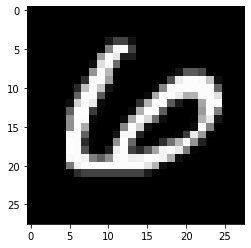

In [0]:
import cv2
import matplotlib.pyplot as plt

print(data[0,0])
plt.imshow(test_sample,cmap = 'gray', vmin=0, vmax=255)

In [0]:
# Preparing to have a tensor of 10000x28x28
M = np.zeros([dims[0], 28, 28, 1])
Y = np.zeros([dims[0], 10])
for i in range(dims[0]):
  M[i,:,:,0] = np.resize(data[i,1:],[28,28])
  Y[i,int(data[i,0]-1)] = 1

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


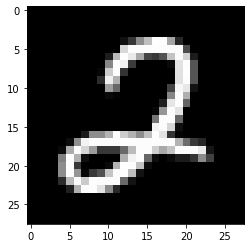

In [0]:
plt.imshow(M[5,:,:,0], cmap='gray', vmin=0, vmax=255)
print(Y[5])

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(M, Y, test_size=0.33, shuffle= True)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(13400, 28, 28, 1)
(13400, 10)
(6600, 28, 28, 1)
(6600, 10)


### Normalizacion


In [0]:
# x_train /= 255

In [0]:
# x_train /= 127.5
# x_train -= 1.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
input_tensor_size = (28,28,1)
num_classes = 10

In [0]:
model = Sequential()
model.add(Conv2D(16, (7,7), padding='same', input_shape = input_tensor_size))
model.add(Activation('relu'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer = SGD(lr=1e-2), metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 32, shuffle=True, validation_data=(x_valid, y_valid))
'''
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(x_train, y_train, epochs = 32, shuffle=True, validation_data=(x_valid, y_valid), callbacks=[early_stopping_monitor])
'''






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 13400 samples, validate on 6600 samples
Epoch 1/32





13400/13400 [==============================] - 20s 2ms/step - loss: 0.7106 - acc: 0.7953 - val_loss: 0.1595 - val_acc: 0.9521
Epoch 2/32
13400/13400 [==============================] - 5s 355us/step - loss: 0.1736 - acc: 0.9478 - val_loss: 0.1074 - val_acc: 0.9695
Epoch 3/32
13400/13400 [==============================] - 5s 352us/step - loss: 0.1184 - acc: 0.9640 - val_loss: 0.0915 - val_acc: 0.9723
Epoch 4/32
13400/13400 [==============================] - 5s 353us/step - loss: 0.0893 - acc: 0.9720 - val_loss: 0.0677 - val_acc: 0.9809
Epoch 5/32
13400/13400 [==============================] - 5s 351us/step - loss: 0.0713 - acc: 0.9769 - val_loss: 0.0640 - val_acc: 0.9805
Epoch 6/32
13400/13400 [==============

'\nfrom keras.callbacks import EarlyStopping\nearly_stopping_monitor = EarlyStopping(patience=2)\n\nmodel.fit(x_train, y_train, epochs = 32, shuffle=True, validation_data=(x_valid, y_valid), callbacks=[early_stopping_monitor])\n'

### Agregando etapas de Pooling tras cada bloque convolucional
tambien se agrega un monitor para detener las iteraciones tras un porcentaje

In [0]:
model = Sequential()
model.add(Conv2D(16, (7,7), padding='same', input_shape = input_tensor_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer = SGD(lr=1e-2), metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(x_train, y_train, epochs = 32, shuffle=True, validation_data=(x_valid, y_valid), callbacks=[early_stopping_monitor])

Train on 13400 samples, validate on 6600 samples
Epoch 1/32
13400/13400 [==============================] - 3s 203us/step - loss: 1.3277 - acc: 0.5570 - val_loss: 0.2354 - val_acc: 0.9294
Epoch 2/32
13400/13400 [==============================] - 2s 163us/step - loss: 0.3538 - acc: 0.8943 - val_loss: 0.1363 - val_acc: 0.9576
Epoch 3/32
13400/13400 [==============================] - 2s 168us/step - loss: 0.2264 - acc: 0.9349 - val_loss: 0.0988 - val_acc: 0.9709
Epoch 4/32
13400/13400 [==============================] - 2s 172us/step - loss: 0.1824 - acc: 0.9518 - val_loss: 0.0941 - val_acc: 0.9714
Epoch 5/32
13400/13400 [==============================] - 2s 177us/step - loss: 0.1490 - acc: 0.9584 - val_loss: 0.1286 - val_acc: 0.9633
Epoch 6/32
13400/13400 [==============================] - 2s 175us/step - loss: 0.1198 - acc: 0.9680 - val_loss: 0.0814 - val_acc: 0.9768
Epoch 7/32
13400/13400 [==============================] - 2s 178us/step - loss: 0.1060 - acc: 0.9687 - val_loss: 0.0805 - v

In [0]:
test_data = genfromtxt('./sample_data/mnist_test.csv',delimiter=',')
# We have 784 spaces for features
# 1 space for the class
dims = data.shape
print(dims)
print(data[0,:].shape)
# Preparing to have a tensor of 10000x28x28
x_test = np.zeros([dims[0], 28, 28, 1])
y_test = np.zeros([dims[0], 10])
for i in range(dims[0]):
  x_test[i,:,:,0] = np.resize(data[i,1:],[28,28])
  y_test[i,int(data[i,0]-1)] = 1

(20000, 785)
(785,)


In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03555494838170143
Test accuracy: 0.98995


### Para uno de los bloques convolucionales: incluya código que permite visualizar los mapas de activación y resultados temporales (de los filtros) dada una imagen de prueba. 

Obteniendo una imagen del test que se usara para la prueba


In [0]:
image_sample = x_test[150]
#plt.imshow(image_sample,cmap = 'gray', vmin=0, vmax=255)
image_sample = np.expand_dims(image_sample, axis = 0)
image_sample.shape

(1, 28, 28, 1)

In [0]:
classes = model.predict_classes(image_sample)
print("Predicted class is:",classes)


Predicted class is: [4]


Mostramos las capas convolucionales

In [0]:
i = 0
for layer in model.layers:
  i = i + 1
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(i, layer.name, filters.shape)

1 conv2d_5 (7, 7, 1, 16)
4 conv2d_6 (5, 5, 16, 32)
7 conv2d_7 (3, 3, 32, 64)
10 conv2d_8 (3, 3, 64, 128)


escogemos la capa convolucional y mostramos los resultados temporales de la capa




(1, 28, 28, 16)
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 14, 14, 32)


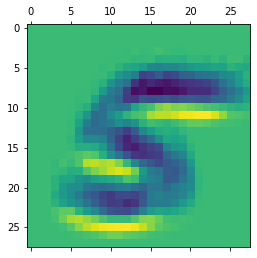

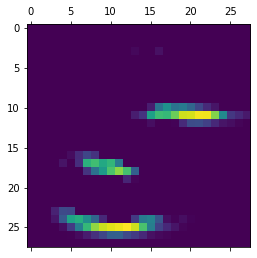

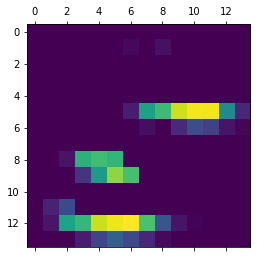

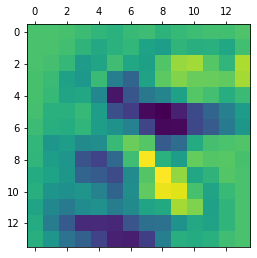

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:4]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image_sample)

first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

second_layer_activation = activations[1]
print(second_layer_activation.shape)
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')

third_layer_activation = activations[2]
print(third_layer_activation.shape)
plt.matshow(third_layer_activation[0, :, :, 4], cmap='viridis')

forth_layer_activation = activations[3]
print(forth_layer_activation.shape)
plt.matshow(forth_layer_activation[0, :, :, 4], cmap='viridis')